# Análisis de Componentes Principales (PCA)

Se importan todas las librerías a utilizar.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv('/content/drive/MyDrive/IA in geo/data.csv',index_col=0)
le=LabelEncoder()

In [4]:
data["cover"]=le.fit_transform(data["cover"])
data=data.sample(n = 380000)
X=data.drop(['class'],axis=1)
y=data['class']
print(X.shape)
print(y.shape)

(380000, 9)
(380000,)


In [5]:
  from imblearn.under_sampling import RandomUnderSampler
  rus=RandomUnderSampler(sampling_strategy=0.5)
  X,y=rus.fit_resample(X,y)
  print(X.shape)
  print(y.shape)

(2283, 9)
(2283,)


Se debe escalar los datos antes de aplicar PCA.

In [6]:
scaler=StandardScaler()
ld=scaler.fit(X)
X_scaled=ld.transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)


## PCA con *Scikitlearn*

In [7]:
n = len(X.columns)  # número de features
pca = PCA().fit(X_scaled)

In [8]:
# print(pca.explained_variance_ratio_)
pca.components_.shape

(9, 9)

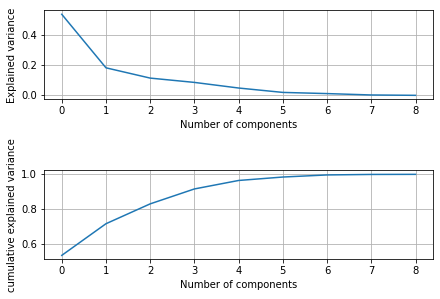

In [9]:
fig, ax=plt.subplots(2,1, constrained_layout=True)
ax[0].plot(pca.explained_variance_ratio_)
ax[0].set_xlabel('Number of components')
ax[0].set_ylabel('Explained variance')
ax[0].grid()
ax[1].plot(np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Number of components')
ax[1].set_ylabel('cumulative explained variance')
ax[1].grid()
plt.show()

Graficamos el acumulado de varianza explicada en las nuevas dimensiones.

Para transformar las observaciones en el nuevo espacio dimencional se utiliza la siguiente función:

In [10]:
from sklearn.model_selection import train_test_split
dataR=data.sample(frac=0.1, replace=True)
X=dataR.drop(['class'],axis=1)
y=dataR['class']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
)

In [11]:
scaler=StandardScaler()
ld=scaler.fit(X)
X_scaled=ld.transform(X_train)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)


In [12]:
pca = PCA(n_components=6).fit(X_scaled)

In [13]:
pca_samples = pca.transform(X_scaled)
pca_samples[y,2]

array([0.09323698, 0.09323698, 0.09323698, ..., 0.09323698, 0.09323698,
       0.09323698])

In [14]:
pca_samples.shape
sampler=pca_samples[0:10]

Para identificar cada variable como se relaciona con las componentes utilizamos las figuras byplot de Python. 0,1 denota el componente principal 1 y 2 (PC1 y PC2). Ademas se grafican las observaciones por cada clase en el nuevo espacio dimensional.

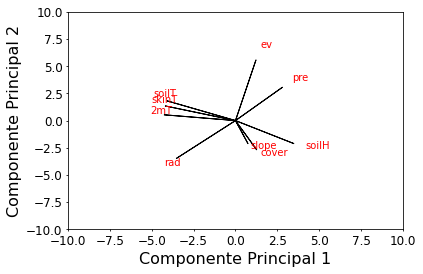

In [15]:
xvector = pca.components_[0] 
yvector = pca.components_[1]

xs = pca.transform(X_scaled)[:,0] 
ys = pca.transform(X_scaled)[:,1]

for i in range(len(xvector)):
  plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys), color='k', width=0.0005, head_width=0.0025)
  plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(X_scaled.columns.values)[i], color='r') 



plt.tick_params('y', colors='k', labelsize=12, length=2)
plt.tick_params('x', colors='k', labelsize= 12, length=2)
plt.xlabel("Componente Principal 1", fontsize=16)
plt.ylabel("Componente Principal 2", fontsize=16)
plt.xlim(-10,10)
plt.ylim(-10,10)

plt.show()

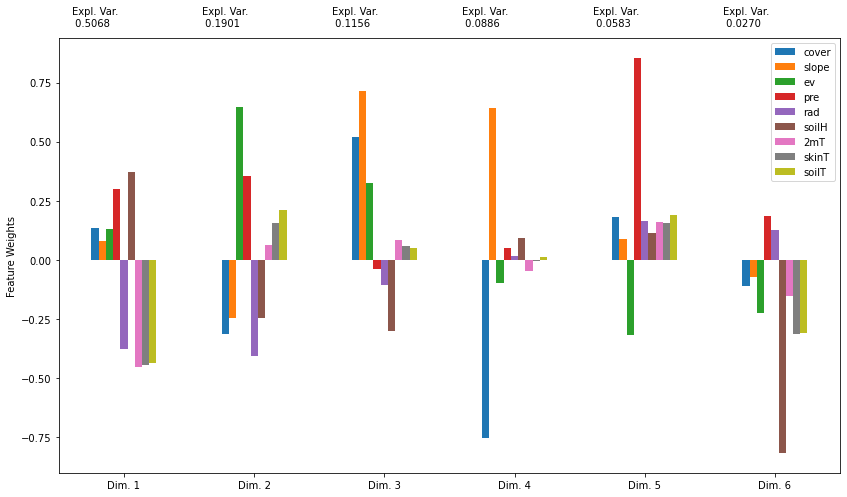

In [16]:
def pca_results(X_scaled, pca):
    
    dimensions = ['Dim. {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    components = pd.DataFrame(np.round(pca.components_, 4), columns = X_scaled.keys()) 
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Expl. Var.\n %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(X_scaled, pca)

Esta tabla también se resume en esta otra tabla.

In [17]:
print(pca_results.cumsum())

        Explained Variance   cover   slope      ev     pre     rad   soilH  \
Dim. 1              0.5068  0.1346  0.0795  0.1300  0.2980 -0.3751  0.3705   
Dim. 2              0.6969 -0.1773 -0.1670  0.7773  0.6537 -0.7793  0.1249   
Dim. 3              0.8125  0.3422  0.5462  1.1013  0.6144 -0.8863 -0.1762   
Dim. 4              0.9011 -0.4097  1.1877  1.0031  0.6632 -0.8717 -0.0842   
Dim. 5              0.9594 -0.2290  1.2759  0.6844  1.5182 -0.7080  0.0308   
Dim. 6              0.9864 -0.3372  1.2058  0.4612  1.7059 -0.5832 -0.7854   

           2mT   skinT   soilT  
Dim. 1 -0.4523 -0.4454 -0.4347  
Dim. 2 -0.3906 -0.2891 -0.2237  
Dim. 3 -0.3074 -0.2296 -0.1744  
Dim. 4 -0.3562 -0.2347 -0.1640  
Dim. 5 -0.1942 -0.0771  0.0256  
Dim. 6 -0.3457 -0.3922 -0.2816  


In [18]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [19]:
X_proj_train = pca.transform(X_train)[:, 0:10]
X_proj_test = pca.transform(X_test)[:, 0:10]
clf = SVC(gamma=0.001)
clf.fit(X_proj_train, y_train)

SVC(gamma=0.001)